In [ ]:
#What causes Heart disease?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from eli5.sklearn import PermutationImportance
import warnings
#perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
#eli5.show_weights(perm, feature_names = X_test.columns.tolist())
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
%matplotlib inline

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* age- in years
* sex-(1 = male; 0 = female)
* cp- chest pain type
* trestbps- resting blood pressure (in mm Hg on admission to the hospital)
* chol- serum cholestoral in mg/dl
* fbs-(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg-resting electrocardiographic results
* thalach-maximum heart rate achieved
* exang-exercise induced angina (1 = yes; 0 = no)
* oldpeak-ST depression induced by exercise relative to rest
* slope-the slope of the peak exercise ST segment
* ca-number of major vessels (0-3) colored by flourosopy
* thal- 3 = normal; 6 = fixed defect; 7 = reversable defect
* target- 1 or 0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot:>

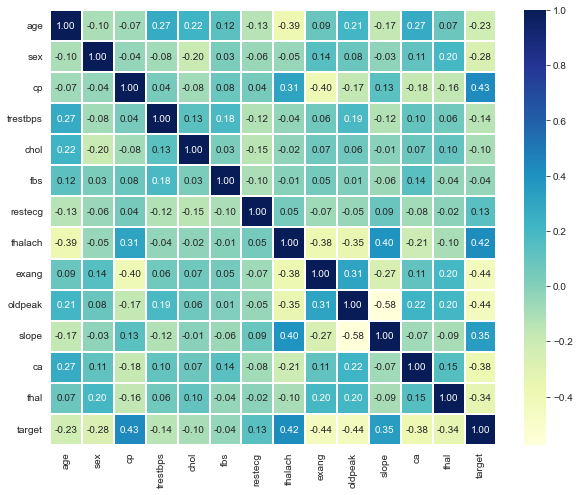

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
#No much of correlation

In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

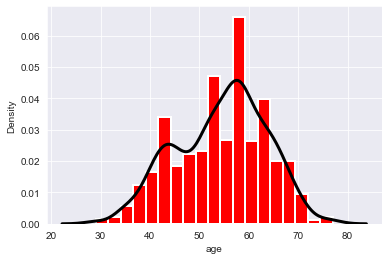

In [8]:
sns.distplot(df['age'],color='Red',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})
#Most people age is from 40 to 60

Text(0.5, 1.0, 'Thal vs Heart Disease')

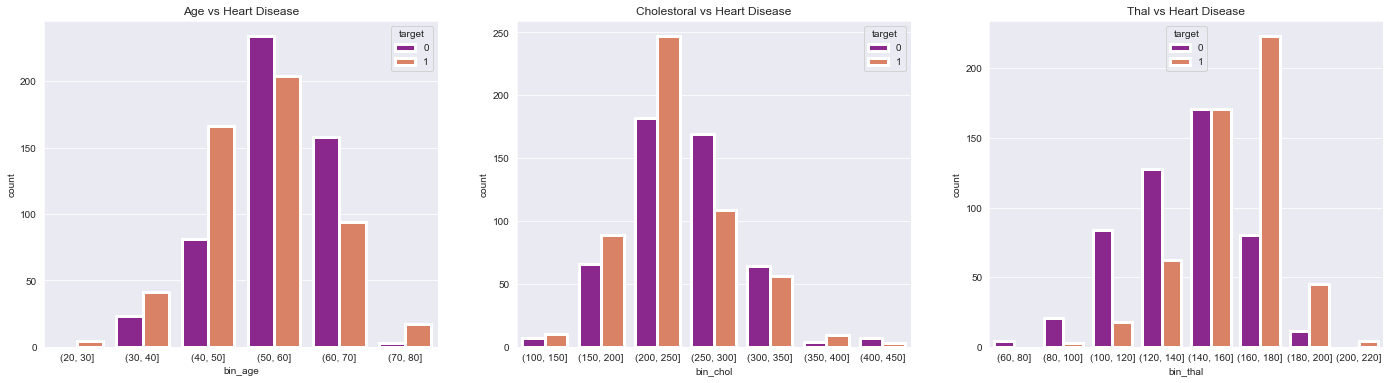

In [9]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 1)
age_bins = [20,30,40,50,60,70,80]
df['bin_age']=pd.cut(df['age'], bins=age_bins)
g1=sns.countplot(x='bin_age',data=df ,hue='target',palette='plasma',linewidth=3)
g1.set_title("Age vs Heart Disease")
#The number of people with heart disease are more from the age 41-55
#Also most of the people fear heart disease and go for a checkup from age 55-65 and dont have heart disease (Precautions)

plt.subplot(1, 3, 2)
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['chol'], bins=cho_bins)
g2=sns.countplot(x='bin_chol',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Cholestoral vs Heart Disease")
#Most people get the heart disease with 200-250 cholestrol 
#The others with cholestrol of above 250 tend to think they have heart disease but the rate of heart disease falls

plt.subplot(1, 3, 3)
thal_bins = [60,80,100,120,140,160,180,200,220]
df['bin_thal']=pd.cut(df['thalach'], bins=thal_bins)
g3=sns.countplot(x='bin_thal',data=df,hue='target',palette='plasma',linewidth=3)
g3.set_title("Thal vs Heart Disease")
#People who have thalach between 140-180 have a very high chance of getting the heart disease 

Text(0.5, 1.0, 'slope of the peak exercise ST segment')

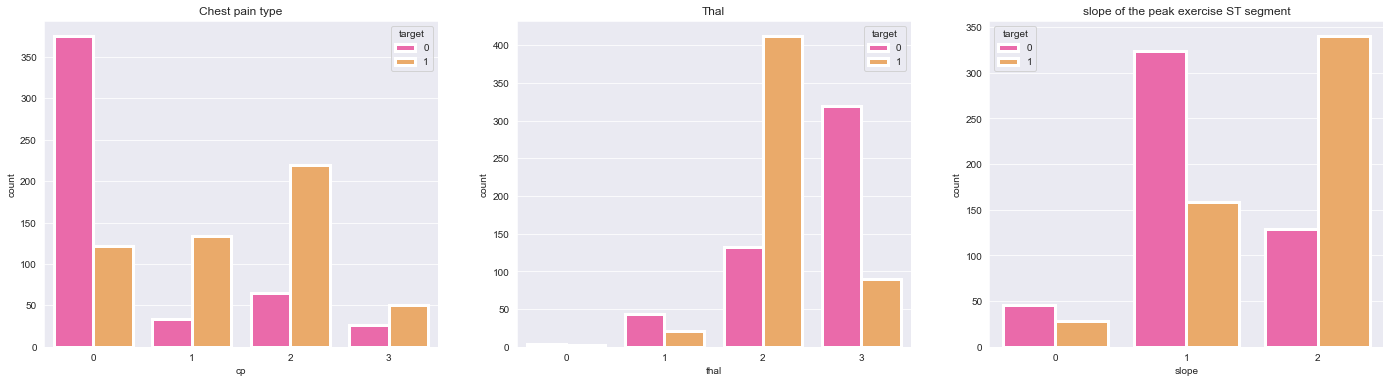

In [10]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(131)
x1=sns.countplot(x='cp',data=df,hue='target',palette='spring',linewidth=3)
x1.set_title('Chest pain type')
#Chest pain type 2 people have highest chance of heart disease

plt.subplot(132)
x2=sns.countplot(x='thal',data=df,hue='target',palette='spring',linewidth=3)
x2.set_title('Thal')
#People with thal 2 have the highest chance of heart disease

plt.subplot(133)
x3=sns.countplot(x='slope',data=df,hue='target',palette='spring',linewidth=3)
x3.set_title('slope of the peak exercise ST segment')
#Slope 2 people have higher chance of heart disease

Text(0.5, 1.0, 'Figure 2')

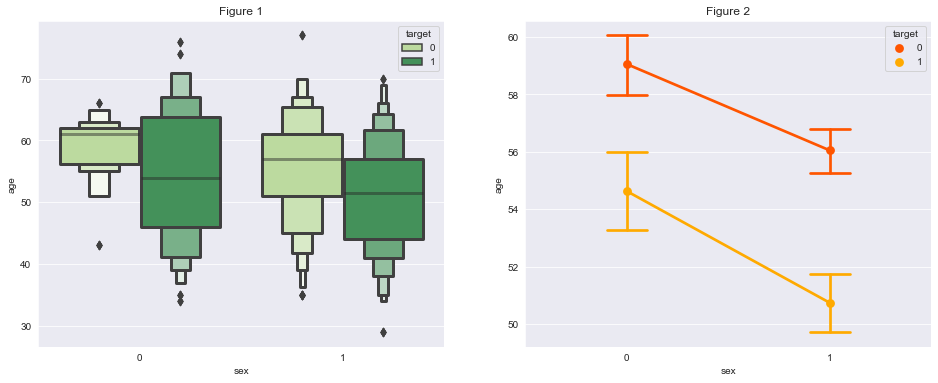

In [11]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(121)
s1=sns.boxenplot(x='sex',y='age',hue='target',data=df,palette='YlGn',linewidth=3)
s1.set_title("Figure 1")
#Figure 1 says most of females having heart disease range from 40-70yrs and men from 40-60yrs

plt.subplot(122)
s2=sns.pointplot(x='sex',y='age',hue='target',data=df,palette='autumn',capsize=.2)
s2.set_title("Figure 2")
#Figure 2 says mean age for female with heart disease around 54yrs and for males around 51yrs

Text(0.5, 1.0, 'Age vs Cp')

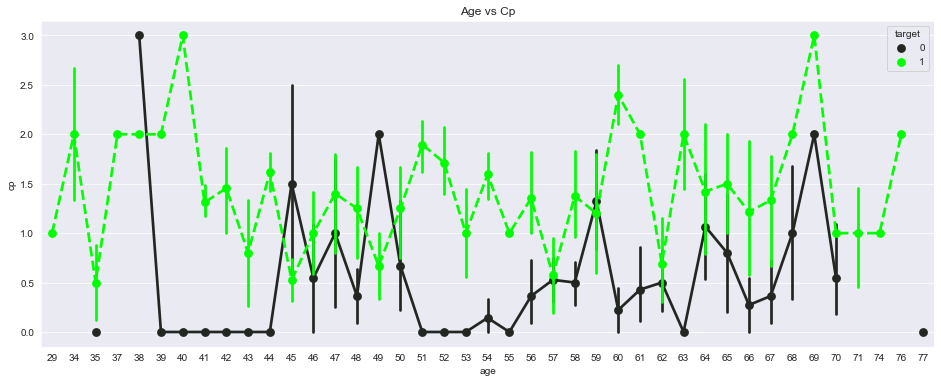

In [12]:
fig,ax=plt.subplots(figsize=(16,6))
sns.pointplot(x='age',y='cp',data=df,color='Lime',hue='target',linestyles=["-", "--"])
plt.title('Age vs Cp')
#People with heart disease tend to have higher 'cp' at all ages only exceptions at age 45 and 49

Text(0.5, 1.0, 'Age vs Thalach')

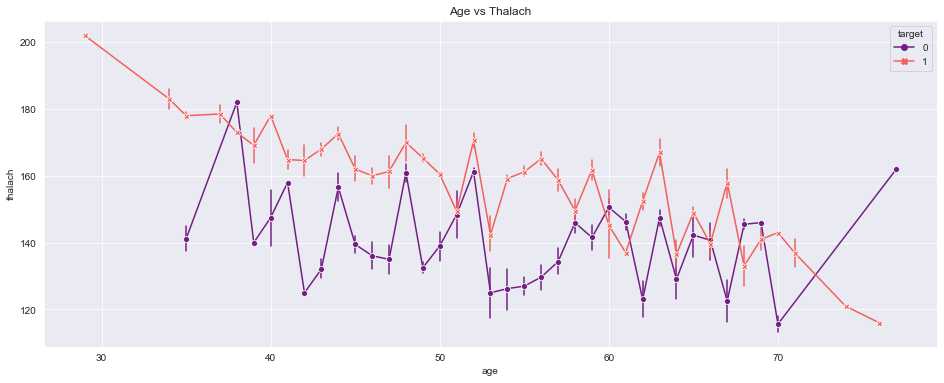

In [13]:
fig,ax=plt.subplots(figsize=(16,6))
sns.lineplot(y='thalach',x='age',data=df,hue="target",style='target',palette='magma',markers=True, dashes=False,err_style="bars", ci=68)
plt.title('Age vs Thalach')
#Thalach always high in people having heart disease and as age increases the thalach seems to reduce and other factors might play a role in heart disease

<AxesSubplot:xlabel='sex', ylabel='thal'>

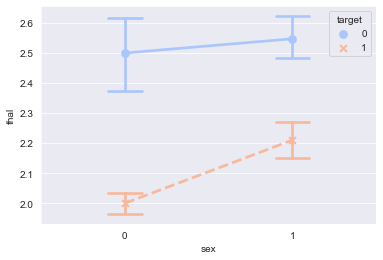

In [14]:
sns.pointplot(x='sex',y='thal',data=df,hue='target',markers=["o", "x"],linestyles=["-", "--"],capsize=.2,palette='coolwarm')
#Both males and females without heart disease have higher thal value and males with heart diseases tend to have higher thal than females

<AxesSubplot:xlabel='ca', ylabel='count'>

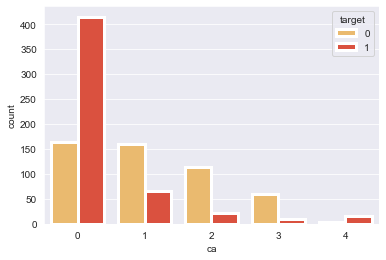

In [15]:
sns.countplot(x='ca',data=df,hue='target',palette='YlOrRd',linewidth=3)
# People with 'ca' as 0 have highest chance of heart disease

<AxesSubplot:xlabel='slope', ylabel='count'>

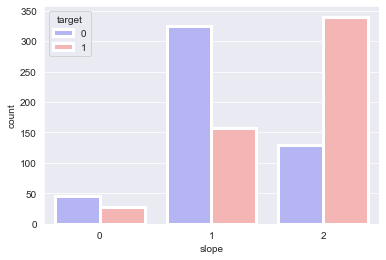

In [16]:
sns.countplot(x='slope',hue='target',data=df,palette='bwr',linewidth=3)
#Slope 2 has highest people with heart disease

Text(0.5, 1.0, 'Figure 3')

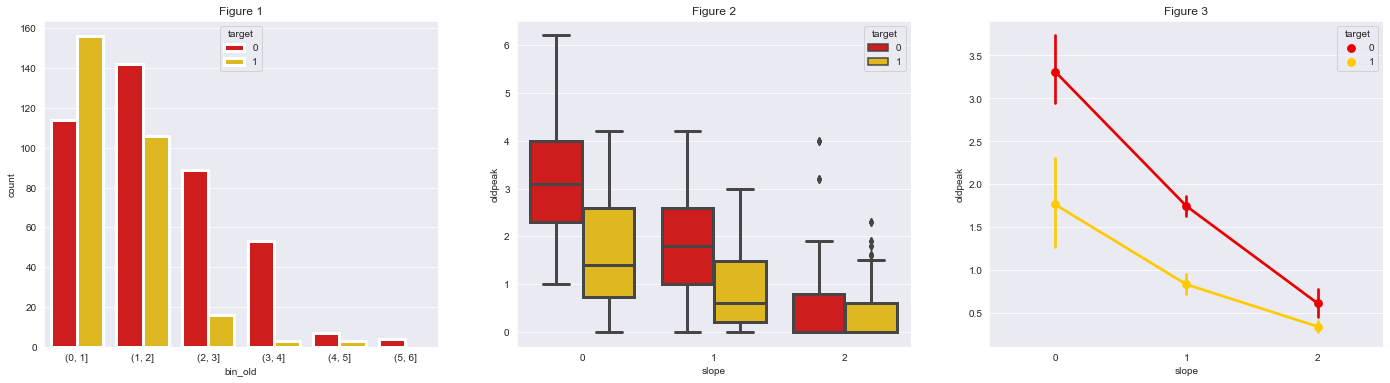

In [17]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(131)
old_bins = [0,1,2,3,4,5,6]
df['bin_old']=pd.cut(df['oldpeak'], bins=old_bins)
sns.countplot(x='bin_old',hue='target',data=df,palette='hot',linewidth=3)
plt.title("Figure 1")
#Figure 1: As the value of oldpeak increases the rate of heart disease decreases

plt.subplot(132)
sns.boxplot(x='slope',y='oldpeak',data=df,hue='target',palette='hot',linewidth=3)
plt.title("Figure 2")
#Figure 2: slope-s and target = 1; for s=0 --> Median Oldpeak=~1.4; for s=1 --> Median Oldpeak=~0.7; for s=2 --> Median Oldpeak=~0

plt.subplot(133)
sns.pointplot(x='slope',y='oldpeak',data=df,hue='target',palette='hot')
plt.title("Figure 3")
#Figure 3: As the value of slope increases the oldpeak values decrease and heart disease people have lower oldpeak

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_age,bin_chol,bin_thal,bin_old
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"(50, 60]","(200, 250]","(160, 180]","(0.0, 1.0]"
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"(50, 60]","(200, 250]","(140, 160]","(3.0, 4.0]"
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(60, 70]","(150, 200]","(120, 140]","(2.0, 3.0]"
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"(60, 70]","(200, 250]","(160, 180]",NaN
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"(60, 70]","(250, 300]","(100, 120]","(1.0, 2.0]"


In [19]:
df.drop(['bin_age','bin_chol','bin_thal','bin_old'],axis=1,inplace=True)

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Modelling 


## Data Cleaning

In [21]:
#Outlier Detection

from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,['trestbps', 'chol','thalach'])

In [22]:
df.loc[Outliers_to_drop] # Show the outliers rows

#No outliers to drop as the values of all the columns are in ranges.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [23]:
#Checking Missing Data
df.isnull().sum()
#No missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
#Conversion to categorical variables
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['ca']=df['ca'].astype('category')
df['thal']=df['thal'].astype('category')
df['target']=df['target'].astype('category')
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [27]:
y=df['target']

In [28]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,125,212,168,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,53,140,203,155,3.1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,70,145,174,125,2.6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,61,148,203,161,0.0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,62,138,294,106,1.9,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [29]:
X=df.drop('target_1',axis=1)
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [30]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.8863636363636364
Decision Tree Classification : 0.9902597402597403
Random Forest Classification : 0.9902597402597403
Gradient Boosting Classification : 0.9512987012987013
Ada Boosting Classification : 0.9090909090909091
Extra Tree Classification : 0.9772727272727273
K-Neighbors Classification : 0.7175324675324676
Support Vector Classification : 0.685064935064935
Gaussian Naive Bayes : 0.8538961038961039


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print(accuracy_score(y_test,log_pred))

[[125  23]
 [ 12 148]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       148
           1       0.87      0.93      0.89       160

    accuracy                           0.89       308
   macro avg       0.89      0.88      0.89       308
weighted avg       0.89      0.89      0.89       308

0.8863636363636364


In [34]:
#Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(logmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_logmodel.fit(X,y)
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1291.5496650148827


In [36]:
logmodel=LogisticRegression(penalty='l2',C=2.7825594022071245)
logmodel.fit(X_train,y_train)
h_log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,h_log_pred))
print(classification_report(y_test,h_log_pred))
print(accuracy_score(y_test,h_log_pred))

#3% increase in the accuracy!!

[[122  26]
 [ 11 149]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       148
           1       0.85      0.93      0.89       160

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

0.8798701298701299


In [ ]:
#Therefore Logistic Regression Model got 88% accuray in Hyperparameter tuning!!!